In [8]:
!jupyter kernelspec list

Available kernels:
  python3    /opt/conda/share/jupyter/kernels/python3
  bash       /usr/local/share/jupyter/kernels/bash


In [14]:
# !python -m venv wavmark2
# !source wavmark2/bin/activate
# !pip install jupyter
# !pip install ipykernel
!python -m ipykernel install --user --name=wavmark2 --display-name "Wavmark"

Installed kernelspec wavmark2 in /root/.local/share/jupyter/kernels/wavmark2


In [1]:
!pip install wavmark soundfile librosa numpy matplotlib

  Using cached wavmark-0.0.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached soundfile-0.13.1-py2.py3-none-manylinux_2_28_x86_64.whl.metadata (16 kB)
  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached huggingface_hub-0.28.1-py3-none-any.whl.metadata (13 kB)
  Using cached resampy-0.4.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 7.5 MB/s eta 0:00:00
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached wavmark-0.0.

In [14]:
import os
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display

# Define paths to your audio files
## Investigated - failed one
# original_audio_path = "/workspace/AcademiCodec/dataset/LibriTTS/test-clean-2/7021_79740_000021_000000.wav"
# encodec_audio_path = "/workspace/AcademiCodec/egs/HiFi-Codec-24k-240d/outputhf-2/7021_79740_000021_000000.wav"
# watermark_audio_path = "/workspace/wavmark/output/outputhf-2/wm_7021_79740_000021_000000.wav"
# g711_audio_path = "/workspace/wavmark/outputhf-dummy/g711/7021_79740_000021_000000.wav"

# ## Succesfull one
original_audio_path = "/workspace/AcademiCodec/dataset/LibriTTS/test-clean-2/260_123288_000027_000000.wav"
encodec_audio_path = "/workspace/AcademiCodec/egs/HiFi-Codec-24k-240d/outputhf-2/260_123288_000027_000000.wav"
watermark_audio_path = "/workspace/wavmark/output/outputhf-2/wm_260_123288_000027_000000.wav"
g711_audio_path = "/workspace/wavmark/output/outputhf-2/g711/260_123288_000027_000000.wav"

# Load audio files
original_audio, sr_original = sf.read(original_audio_path)
encodec_audio, sr_encodec = sf.read(encodec_audio_path)
watermark_audio, sr_watermark = sf.read(watermark_audio_path)
g711_audio, sr_g711 = sf.read(g711_audio_path)

In [13]:
# Verify sample rates
print(f"Sample Rates - Original: {sr_original}, Encodec: {sr_encodec}, Watermark: {sr_watermark}, G711: {sr_g711}")

# Check if sample rates are consistent
if not (sr_original == sr_encodec == sr_watermark == sr_g711):
    print("⚠ Warning: Sample rates are not consistent across files!")

# Check waveform lengths
print(f"Audio Lengths - Original: {len(original_audio)}, Encodec: {len(encodec_audio)}, Watermark: {len(watermark_audio)}, G711: {len(g711_audio)} ")

Sample Rates - Original: 24000, Encodec: 24000, Watermark: 24000, G711: 24000
Audio Lengths - Original: 127440, Encodec: 127440, Watermark: 112000, G711: 111999 


In [15]:
# Verify sample rates
print(f"Sample Rates - Original: {sr_original}, Encodec: {sr_encodec}, Watermark: {sr_watermark}, G711: {sr_g711}")

# Check if sample rates are consistent
if not (sr_original == sr_encodec == sr_watermark == sr_g711):
    print("⚠ Warning: Sample rates are not consistent across files!")

# Check waveform lengths
print(f"Audio Lengths - Original: {len(original_audio)}, Encodec: {len(encodec_audio)}, Watermark: {len(watermark_audio)}, G711: {len(g711_audio)} ")

Sample Rates - Original: 24000, Encodec: 24000, Watermark: 24000, G711: 24000
Audio Lengths - Original: 109680, Encodec: 109680, Watermark: 96000, G711: 96000 


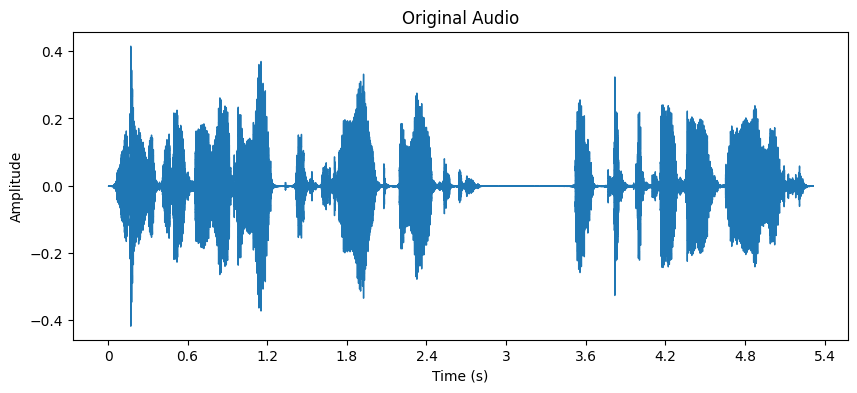

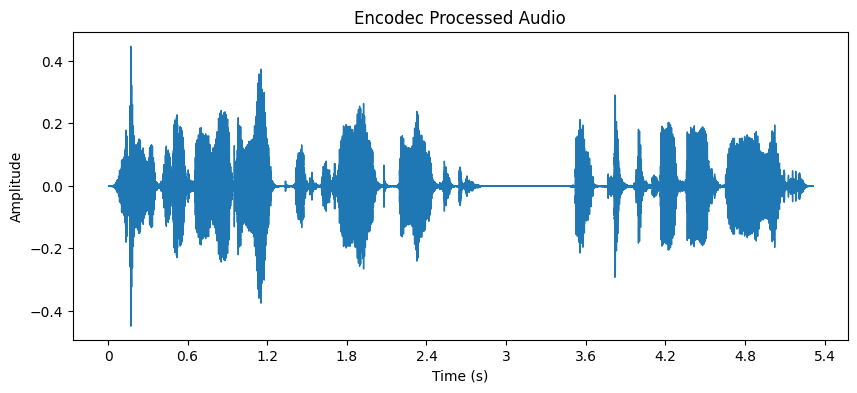

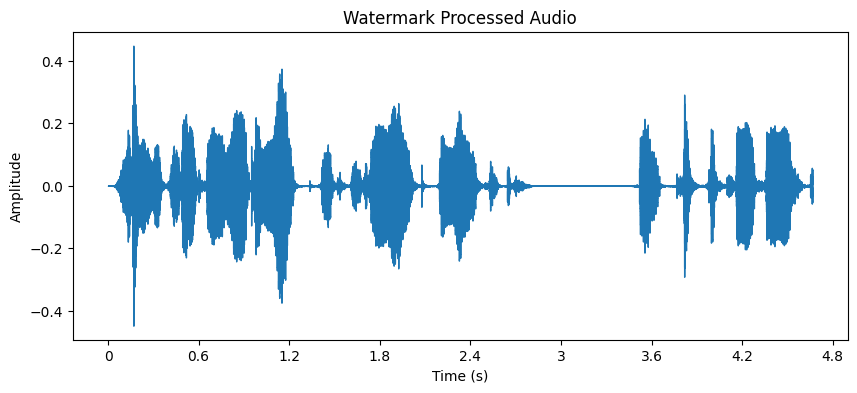

In [4]:
# Plot waveforms
def plot_waveform(audio, sr, title):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

plot_waveform(original_audio, sr_original, "Original Audio")
plot_waveform(encodec_audio, sr_encodec, "Encodec Processed Audio")
plot_waveform(watermark_audio, sr_watermark, "Watermark Processed Audio")

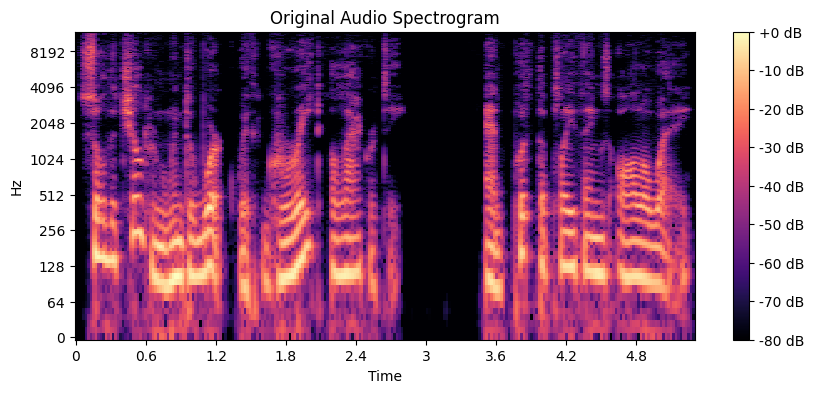

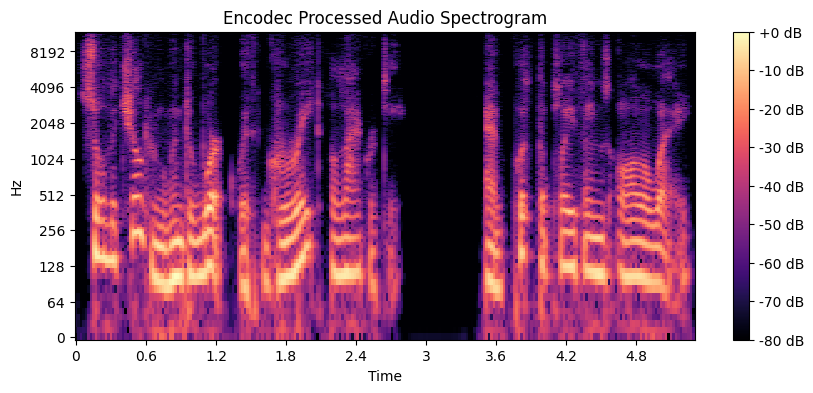

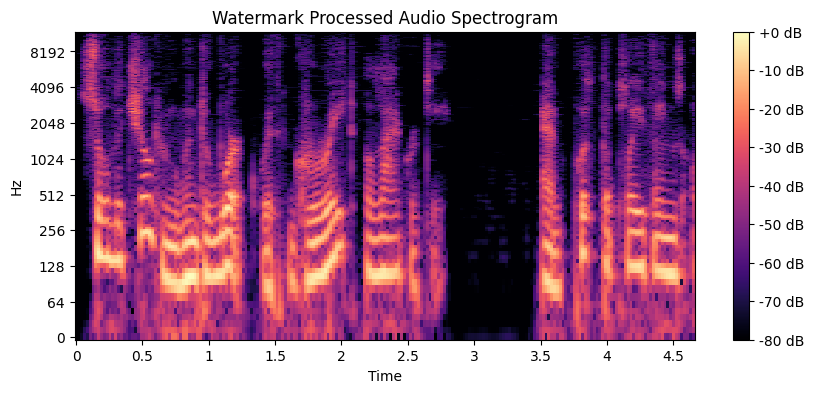

In [5]:
# Compute and visualize spectrograms
def plot_spectrogram(audio, sr, title):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

plot_spectrogram(original_audio, sr_original, "Original Audio Spectrogram")
plot_spectrogram(encodec_audio, sr_encodec, "Encodec Processed Audio Spectrogram")
plot_spectrogram(watermark_audio, sr_watermark, "Watermark Processed Audio Spectrogram")

In [6]:
# Check for mismatched lengths causing shape errors
expected_length = 16000  # Example assumption
print(f"Expected length for processing: {expected_length}")
print(f"Original length: {len(original_audio)}")
print(f"Encodec length: {len(encodec_audio)}")
print(f"Watermark length: {len(watermark_audio)}")

if len(watermark_audio) != expected_length:
    print("⚠ Warning: Watermark-processed audio has unexpected length, which might cause shape mismatch in G726 attack!")


Expected length for processing: 16000
Original length: 127440
Encodec length: 127440
Watermark length: 112000
⚠ Warning: Watermark-processed audio has unexpected length, which might cause shape mismatch in G726 attack!
